In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
from scipy import stats
import seaborn as sns
sns.set_style('whitegrid')

In [21]:
import warnings
warnings.simplefilter(action='ignore')

from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split


In [22]:
train = pd.read_csv('Housing Dreams/house_train_raw.csv')
test = pd.read_csv('Housing Dreams/houses_test_raw.csv')

In [23]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [25]:
# se guarda los indices de Test para posteriomente borrarlos
test_id = test['Id']
train.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

In [26]:
# se visualiza la cantidad de columnas y filas de ambos dataframes

print(f"El número de filas y columnas del train dataset son: {train.shape[0]} y {train.shape[1]}")
print(f"El número de filas y columnas del test dataset son: {test.shape[0]} y {test.shape[1]}")

El número de filas y columnas del train dataset son: 1460 y 80
El número de filas y columnas del test dataset son: 1459 y 79


Hay 1 columna menos en el conjunto de datos de prueba "test" porque necesitamos predecir el precio de las casas para el conjunto de datos de prueba

## Análisis de la columna Precio de venta

Se explora la funcion objetivo. En este caso en particular  se analizará **SalePrice**

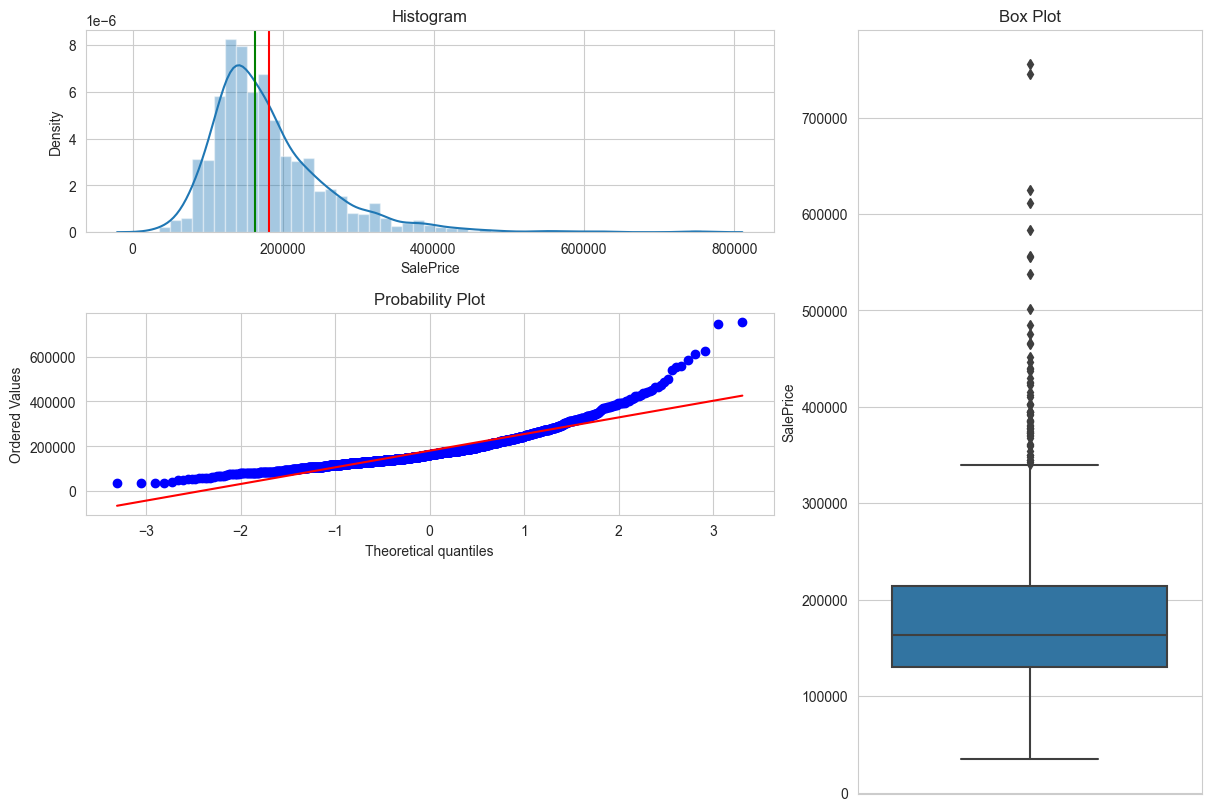

In [27]:
df= train

def three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title.
    ax3.set_title('Box Plot')
    sns.boxplot(y=df.loc[:,feature], orient = 'v', ax = ax3 )
    
three_chart_plot(df, 'SalePrice')

**La línea roja en el histograma indica la media de SalePrice y la línea verde indica la mediana**

- A partir de los gráficos anteriores se puede observar que el precio de venta no posee una distribucion normal. Del diagrama de caja se observa que el conjunto de datos tiene una gran cantidad de outliers.
- En la gráfica de probabilidad, la línea roja representa aquellos puntos que se hubieran trazado para los puntos del eje y **si estos tuvieran una distribucion normal**. Los puntos azules representan el comportamiento real.


In [28]:
from scipy.stats import skew
print("La asimetría del SalesPrice es:", df['SalePrice'].skew())

La asimetría del SalesPrice es: 1.8828757597682129


La asimetría se refiere a la cantidad de asimetría en la característica dada o, en otras palabras, la cantidad de distorsiones de la distribución normal.
Se observa que el valor de la asimetría es bastante alto, esto significa que hay una gran cantidad de asimetría. La asimetria presente es positiva.

# Valores Nulos

Hay una biblioteca increíble llamada missingno que nos ayuda a visualizar la cantidad de valores nulos presentes en cada característica

<AxesSubplot:>

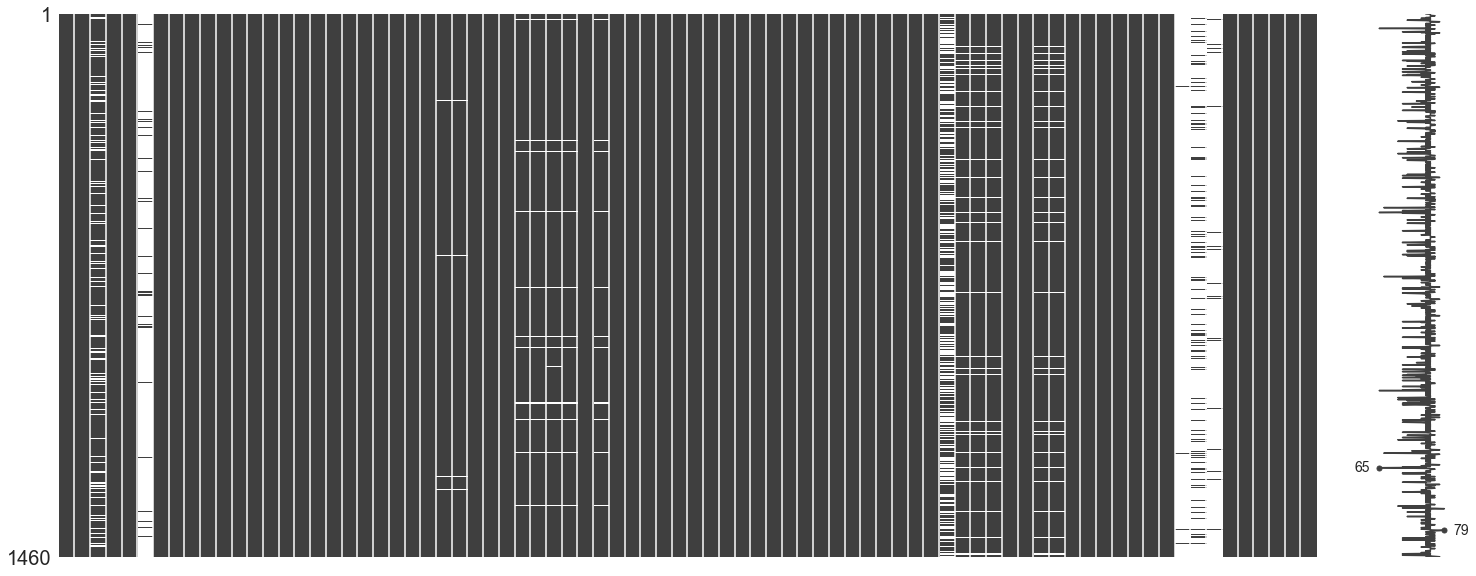

In [29]:
import missingno as msno
%matplotlib inline
msno.matrix(train)

Se observa gran cantidad de valores Null

<AxesSubplot:>

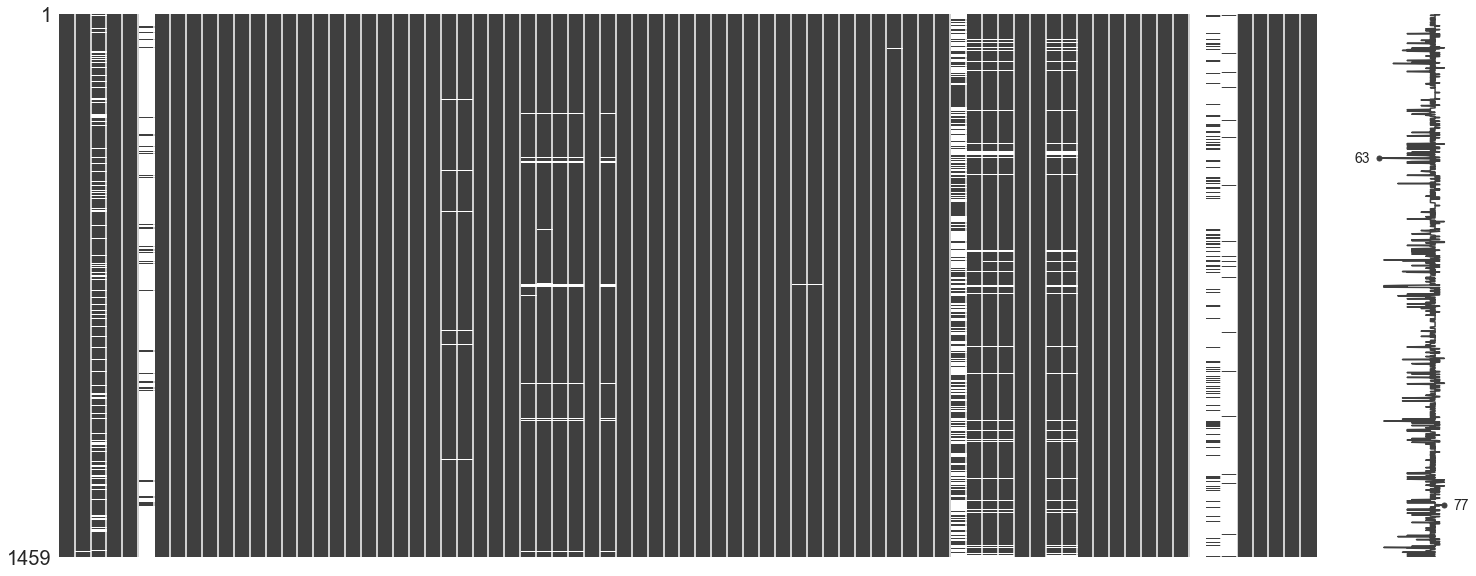

In [30]:
msno.matrix(test)

In [31]:
def null_table(data):
    """
    Funcion q devuelve el numero y porcentaje de valores nulos de un dataset
    """
    indices = data.isnull().sum().index
    values = data.isnull().sum().values
    percentages = []
    for i in indices:
        percentages.append((data[i].isnull().sum() / data[i].shape[0]) * 100)
    d = {'Columns' : indices, 'Count of Null Values' : values, 'Approximate Percentage of Null Values' : percentages}
    # data = dict(zip(indices, percentages))
    null_frame = pd.DataFrame(data = d)
    return null_frame

In [32]:
null_frame_train = null_table(df)
null_frame_train.sort_values(by = 'Approximate Percentage of Null Values').tail(10)

,Columns,Count of Null Values,Approximate Percentage of Null Values
62,GarageQual,81,5.547945
59,GarageFinish,81,5.547945
63,GarageCond,81,5.547945
57,GarageType,81,5.547945
2,LotFrontage,259,17.739726
56,FireplaceQu,690,47.260274
72,Fence,1179,80.753425
5,Alley,1369,93.767123
73,MiscFeature,1406,96.301370
71,PoolQC,1453,99.520548


In [33]:
null_frame_test = null_table(test)
null_frame_test.sort_values(by = 'Approximate Percentage of Null Values').tail(10)

,Columns,Count of Null Values,Approximate Percentage of Null Values
62,GarageQual,78,5.346127
58,GarageYrBlt,78,5.346127
59,GarageFinish,78,5.346127
63,GarageCond,78,5.346127
2,LotFrontage,227,15.558602
56,FireplaceQu,730,50.034270
72,Fence,1169,80.123372
5,Alley,1352,92.666210
73,MiscFeature,1408,96.504455
71,PoolQC,1456,99.794380


Debemos observar aquí que NA tiene un significado diferente, no se puede eliminar ni imputar las filas q contienen vales NA. Por ejemplo, si uno de los valores de Alley es NA, significa que la casa no tiene Alley o si el valor de GarageType es NA, significa que esa casa en particular no tiene garaje.Por eso hay que tener en cuenta estos valores ya que pueden afectar a los precios finales de la vivienda.


In [34]:
# Se analiza los valores nulos al combinar ambos datasets

na = train.shape[0]
nb = test.shape[0]
y_train = train['SalePrice'].to_frame()
# Combinar train y test datasets
total = pd.concat((train, test), sort = False).reset_index(drop = True)
#Se elimina las columnas "SalePrice" e Id 
total.drop(['SalePrice'], axis = 1, inplace = True)
print(f"La medida del dataset Total es: {total.shape}")

La medida del dataset Total es: (2919, 79)


In [35]:
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title(' Porcentaje de Valores olvidados por columna', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columnas con mas del {thresh}% Valores olvidados', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columnas con menos del {thresh}% Valores olvidados', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columnas', size=15, weight='bold')
    plt.ylabel('Porcentaje de Valores olvidados')
    plt.yticks(weight ='bold')
    
    return plt.show()


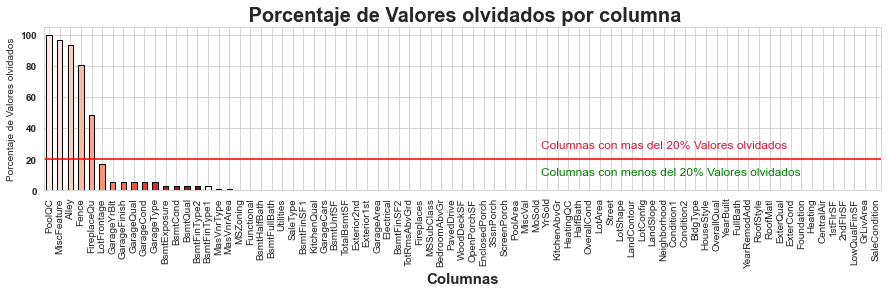

In [36]:
msv_1(total, 20, color=sns.color_palette('Reds',15))

# Variables Numericas  y Categóricas

Se procede a explorar las variables numéricas

In [37]:
category_var = df.select_dtypes(include = 'object')
num_var = df.select_dtypes(exclude = 'object')

print("Numero de variables categóricas: ", category_var.shape[1])
print("Número de variables numéricas: ", num_var.shape[1])

Numero de variables categóricas:  43
Número de variables numéricas:  37


Es preciso observar la correlacion de las variables numéricas con SalePrice

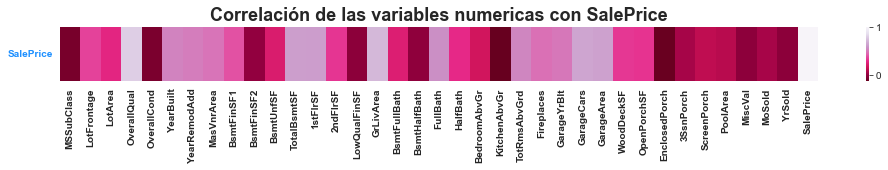

In [38]:
num = df.select_dtypes(exclude = 'object')
corr_num = num.corr()

f, ax = plt.subplots(figsize = (17, 1))

sns.heatmap(corr_num.sort_values(by = ['SalePrice'], ascending = False).head(1), cmap='PuRd_r')

plt.title('Correlación de las variables numericas con SalePrice', weight = 'bold', fontsize = 18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

plt.show()

In [39]:
correlation = df.corr()['SalePrice'].sort_values(ascending = False).to_frame().head(10)

cmap = sns.light_palette("cyan", as_cmap = True)

s = correlation.style.background_gradient(cmap = cmap)

s

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


De esta tabla se concluye que cuanto mayor sea la calidad general de la casa, mayor será el precio de la misma (esto tambien se observa en la vida real). Del mismo modo sucede para el área de vivienda, es decir, a medida que aumenta el área, mayor será el precio de venta.

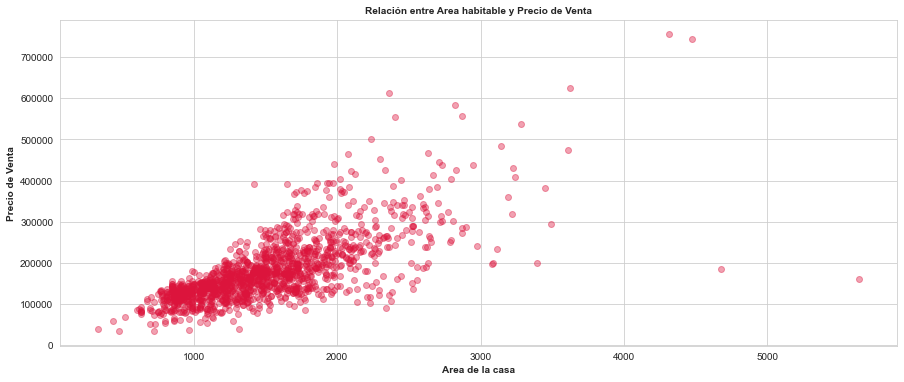

In [40]:
# gráfico para examinar la relación entre GrLivArea y SalePrice

plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = df, color='crimson', alpha=0.4)
plt.title('Relación entre Area habitable y Precio de Venta', weight = 'bold', fontsize = 10)
plt.xlabel('Area de la casa', weight = 'bold')
plt.ylabel('Precio de Venta', weight = 'bold')
plt.show()

Del gráfico se observa que existe una relación casi lineal entre la Superficie Habitable y el Precio de Venta. Si el área es enorme, entonces el precio también debería haber sido alto, pero los dos puntos más a la derecha sugieren otra cosa. Estos dos puntos son valores outliers.

In [41]:
#eliminando outliers

train = train[train['GrLivArea'] < 4500]
previous_train = df #para conservar la data
df = train

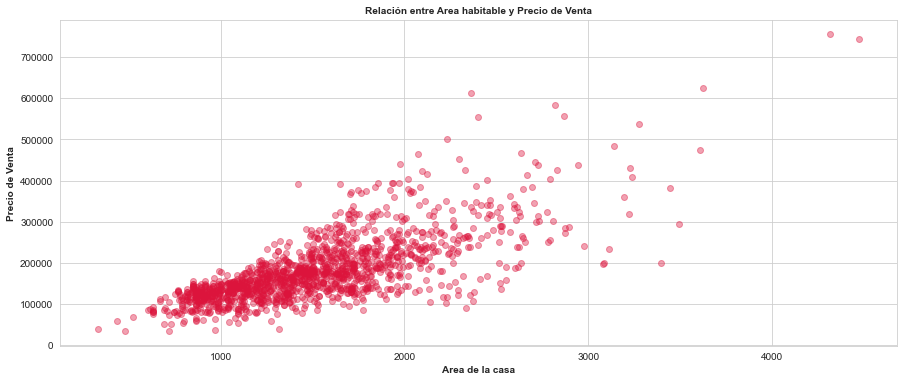

In [42]:

plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = df, color='crimson', alpha=0.4)
plt.title('Relación entre Area habitable y Precio de Venta', weight = 'bold', fontsize = 10)
plt.xlabel('Area de la casa', weight = 'bold')
plt.ylabel('Precio de Venta', weight = 'bold')
plt.show()

Se visualiza que se eliminaron los outliers con éxito

**Garage Area**

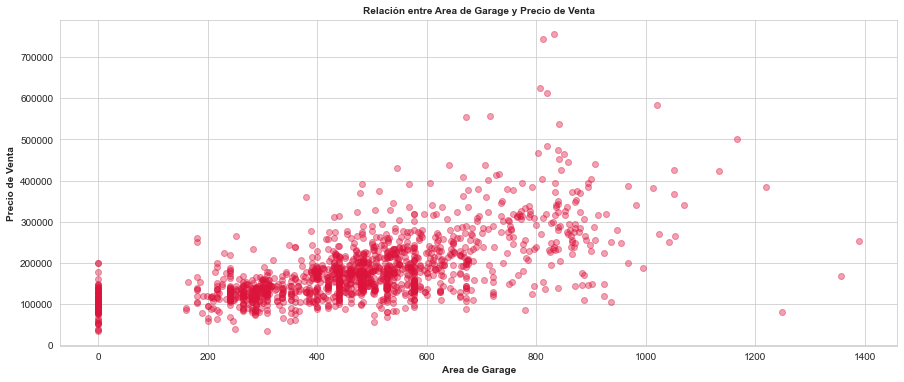

In [43]:

plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'GarageArea', y = 'SalePrice', data = df, color='crimson', alpha=0.4)
plt.title('Relación entre Area de Garage y Precio de Venta', weight = 'bold', fontsize = 10)
plt.xlabel('Area de Garage', weight = 'bold')
plt.ylabel('Precio de Venta', weight = 'bold')
plt.show()

**Total Basement Area**

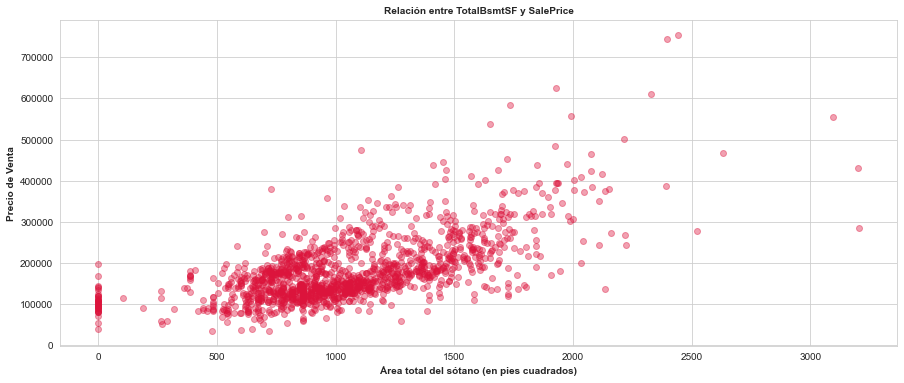

In [44]:

plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'TotalBsmtSF', y = 'SalePrice', data = df, color='crimson', alpha=0.4)
plt.title('Relación entre TotalBsmtSF y SalePrice', weight = 'bold', fontsize = 10)
plt.xlabel('Área total del sótano (en pies cuadrados)', weight = 'bold')
plt.ylabel('Precio de Venta', weight = 'bold')
plt.show()


Es preciso entender los supuestos de la regresión lineal: 
- Linealidad 
- Homocedasticidad 
- Poca o nula Multicolinealidad 
- Independencia del error 

Puesto que se usara un modelo lineal, asumimos que la relación es lineal y que los errores, o residuos, son puras fluctuaciones aleatorias alrededor de la línea verdadera. Se espera que la variabilidad en la variable dependiente no aumente a medida que aumenta el valor de la independiente, que son los supuestos de igual varianza, también conocida como homocedasticidad. Se asume tambien que las observaciones son independientes entre sí (sin multicolinealidad), y no existe una correlación entre observaciones secuenciales o autocorrelación. 

Ahora, estas suposiciones son propensas a suceder por completo. En otras palabras, si vemos una de estas suposiciones en el conjunto de datos, es más probable que nos encontremos con otras mencionadas anteriormente. Por lo tanto, es posible encontrar y corregir varios supuestos con algunas técnicas. 

Para descubrir la linealidad, es necesario trazar diagramas de dispersión para GrLivArea y MasVnrArea

**La homocedasticidad es una característica de un modelo de regresión lineal que implica que la varianza de los errores es constante a lo largo del tiempo.**

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

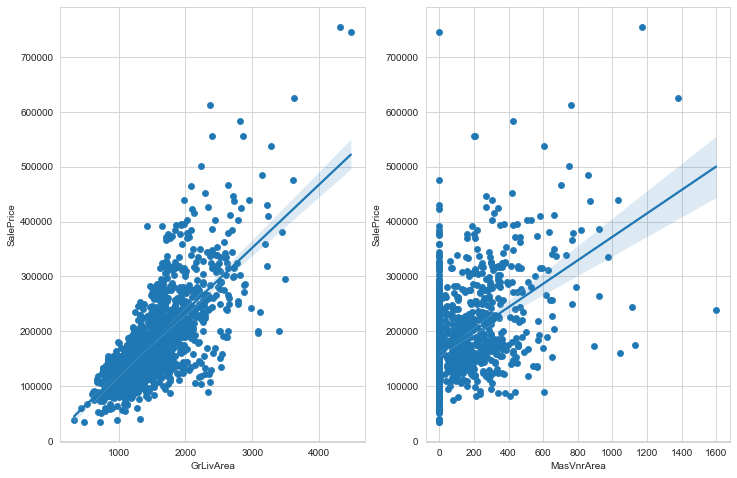

In [45]:
## Scatter plotting for SalePrice and GrLivArea.
fig, (ax1, ax2) = plt.subplots(figsize = (12, 8), ncols = 2,sharey = False)
 
sns.scatterplot(x = df['GrLivArea'], y = df['SalePrice'],  ax = ax1)
## Putting a regression line. 
sns.regplot(x = df['GrLivArea'], y = df['SalePrice'], ax = ax1)

sns.scatterplot(x = df['MasVnrArea'],y = df['SalePrice'], ax = ax2)
## regression line for MasVnrArea and SalePrice. 
sns.regplot(x = df['MasVnrArea'], y = df['SalePrice'], ax=ax2)

Se observa que la relación entre Sales Price y GrLivArea es mucho más lineal que la relación entre Sales Price y MasVnrArea.

Es necesario observar y analizar el gráfico residual para la variable independiente GrLivArea y la variable objetivo SalePrice. 

Un valor residual es una medida de cuánto pierde una línea de regresión verticalmente un punto de datos. Las líneas de regresión son el mejor ajuste de un conjunto de datos. Se puede tomar las líneas como promedios; algunos puntos de datos encajarán en la línea y otros no. 

Una gráfica residual tiene los valores residuales en el eje vertical; en el eje horizontal se muestra la variable independiente.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

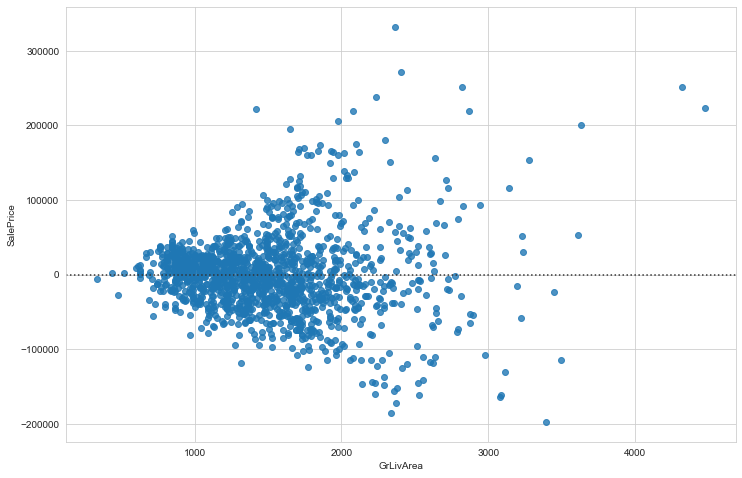

In [46]:
plt.subplots(figsize = (12,8))
sns.residplot(df['GrLivArea'], df['SalePrice'])

Idealmente, si se cumplen los supuestos, los residuos se dispersarán aleatoriamente alrededor de la línea central de cero sin un patrón aparente. El residuo se verá como una nube de puntos sin estructura centrada alrededor de cero. Sin embargo, en el grafico anterior la trama residual es cualquier cosa menos una nube de puntos sin estructura. Aunque pareciera que existe una relación lineal entre la variable de respuesta y la variable de predicción, el gráfico de residuos tiene forma de un embudo. 

El gráfico de error muestra que a medida que aumenta el valor de GrLivArea, también aumenta la varianza, que es la característica conocida como Heteroscedasticidad. 

Para el análisis de regresión lineal se requiere que la variable dependiente tenga una distribución normal multivariada. Un histograma, un diagrama de caja o un Q-Q-Plot pueden verificar si la variable de destino tiene una distribución normal. 

Es necesario observar los tres gráficos nuevamente para la característica objetivo.

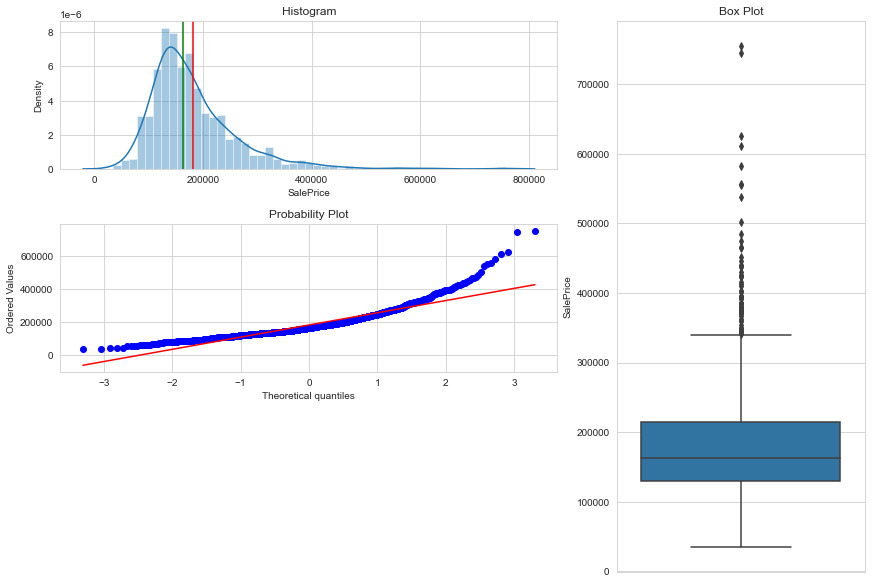

In [47]:
three_chart_plot(df, 'SalePrice')

Hay que asegurarse de que la variable objetivo siga una distribución normal. Para hacer que una característica siga una distribución normal, se realizará una transformación logarítmica.

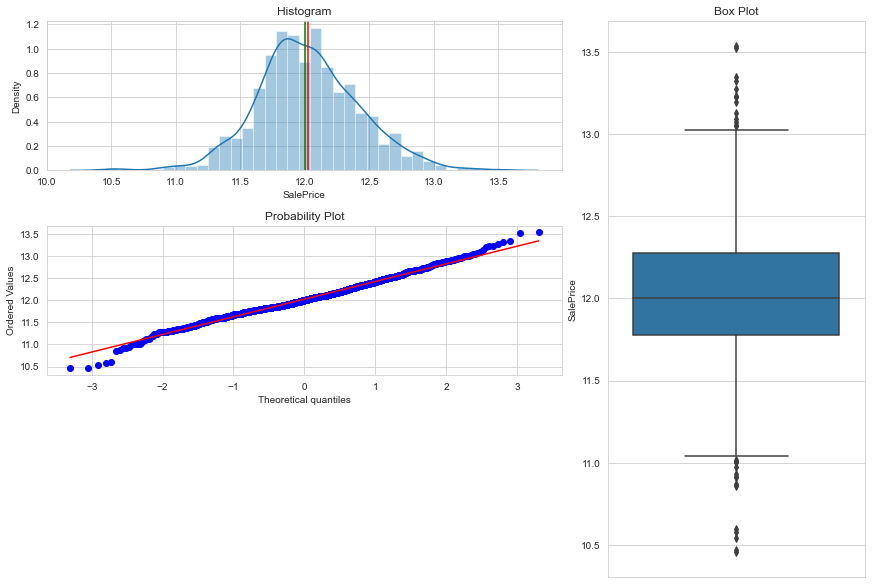

In [48]:
train["SalePrice"] = np.log1p(train["SalePrice"])
df = train
three_chart_plot(df, 'SalePrice')

La característica SalesPrice ahora sigue una distribución normal ya que el histograma se parece a una campana y el gráfico QQ también se superpone con la línea roja. 

Ahora se observará el diagrama de dispersión para GrLivArea y SalePrice para ver si se eliminó la heterocedasticidad.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

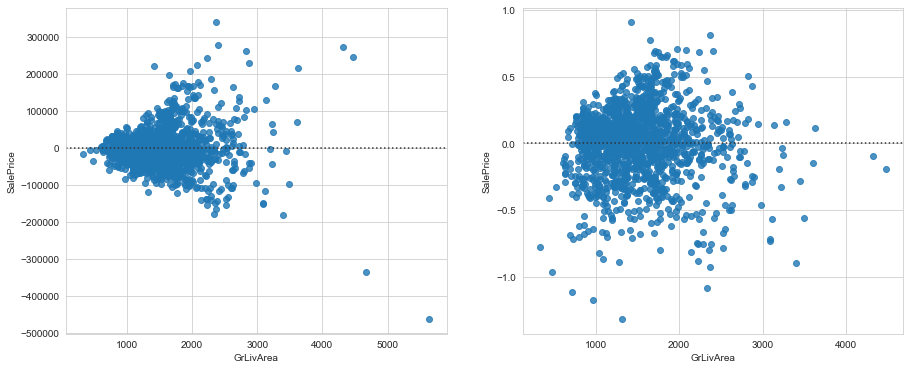

In [49]:
fig, (ax1, ax2) = plt.subplots(figsize = (15, 6),
                              ncols = 2,
                              sharey = False,
                              sharex = False)

sns.residplot(previous_train['GrLivArea'], previous_train['SalePrice'], ax = ax1)
sns.residplot(df['GrLivArea'], df['SalePrice'], ax = ax2)

Se observa que el diagrama de dispersión de la izquierda tenía heteroscedasticidad (forma similar a un embudo), pero después de aplicar la transformación logarítmica a la función, se eliminó y ahora es homoscedástico.

La regresión lineal indica relaciones significativas entre la variable dependiente y la variable independiente. Asume que existe una relación lineal entre las variables independientes y la variable dependiente, pero esto no siempre es así en la vida real. Hay muy pocos escenarios en los que esta suposición es cierta. La regresión múltiple también sufre de multicolinealidad, autocorrelación y heteroscedasticidad.

La interpretación del coeficiente lineal es que representa el cambio medio en la variable dependiente por 1 unidad de cambio en la variable independiente cuando todas las demás variables independientes se mantienen constantes. Ahora suponga que hay dos variables independientes correlacionadas (A y B) y nuestro objetivo es encontrar el coeficiente correcto para estas variables independientes. Cuando se calcule el coeficiente para A, ¿será exacto ese coeficiente? No, no será correcto porque los cambios en A están asociados con cambios en B, y puesto que es necesario que todas las demás variables deben mantenerse constantes, B no puede mantenerse constante porque A y B son correlacionado. Esto se conoce como multicolinealidad y es una de las desventajas de la regresión lineal.

Para resolver este problema, utilizamos varias técnicas de regularización (l1, l2, etc.) u otro tipo de técnicas de regresión como Elastic Net Regression, Lasso y Ridge Regression que automáticamente se encargan de la multicolinealidad.

<Figure size 1080x720 with 0 Axes>

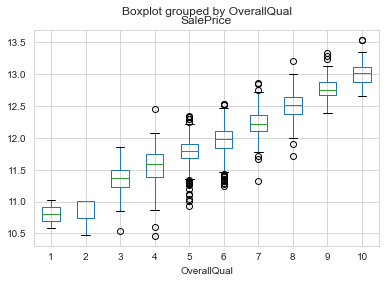

In [50]:
plt.figure(figsize = ((15, 10)))
df.boxplot(by = 'OverallQual', column = 'SalePrice')
plt.show()

A medida que aumenta la calidad, el precio de las casas también aumenta

**Explorando variables categóricas**

In [51]:
def horizontal_plot(data, column_name, color, plot_title):
    
    """
    Una función que traza un gráfico de barras horizontales para el nombre de una columna dado
    """
    
    fig, ax = plt.subplots(figsize = (9, 6))
    
    title_cnt = data[column_name].value_counts().sort_values(ascending = False).reset_index()

    mn = ax.barh(title_cnt.iloc[:, 0], title_cnt.iloc[:, 1], edgecolor = 'black', color =
                sns.color_palette(color, len(title_cnt)))

    for s in ['top','bottom','left','right']:
        ax.spines[s].set_visible(False)

    # Remove x,y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad=5)
    ax.yaxis.set_tick_params(pad=10)

    # Add x,y gridlines
    ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

    # Show top values 
    ax.invert_yaxis()

    ax.set_title(plot_title,weight='bold',loc='center', pad=10, fontsize=16)
    
    ax.set_xlabel('Cantidad', weight='bold')

    for i in ax.patches:
        ax.text(i.get_width() + 1.0, i.get_y() + 0.5, str(round((i.get_width()), 2)),
                fontsize=10, fontweight='bold', color='grey')

    plt.yticks(weight='bold')
    plt.xticks(weight='bold')

    plt.show()

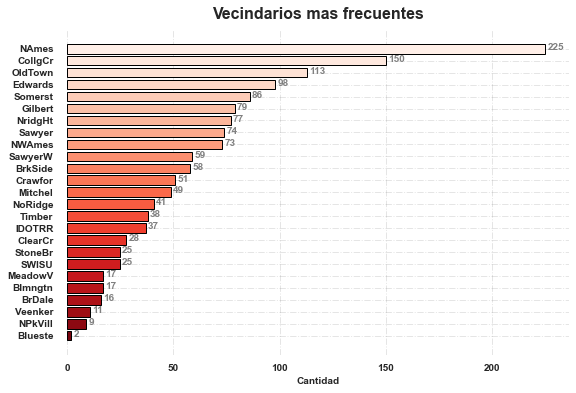

In [52]:
horizontal_plot(df, 'Neighborhood', 'Reds', 'Vecindarios mas frecuentes')

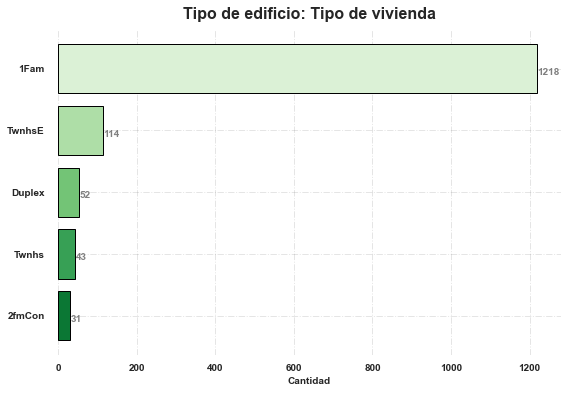

In [53]:
horizontal_plot(df, 'BldgType', 'Greens', 'Tipo de edificio: Tipo de vivienda')

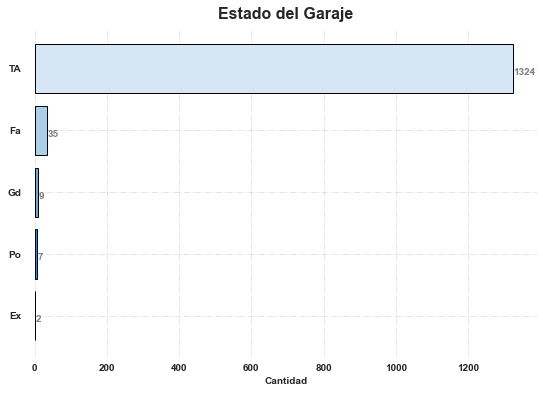

In [54]:
horizontal_plot(df, 'GarageCond', 'Blues', 'Estado del Garaje')

La mayoría de las casas tienen condiciones de garaje típicamente promedio. Solo un par de casas tienen excelentes condiciones de garaje excelente.

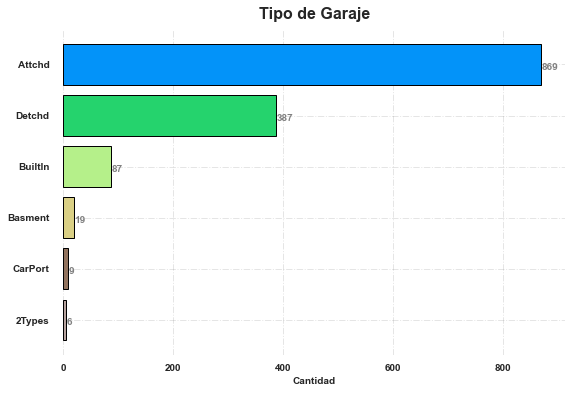

In [55]:
horizontal_plot(df, 'GarageType', 'terrain', 'Tipo de Garaje')

La mayoría de las casas tienen Garajes Adjuntos y solo 19 tienen Garajes en el Sótano

# Feature Engineering

FEATURE ENGINEERING es es una técnica de aprendizaje automático que aprovecha los datos para crear nuevas variables que no están en el conjunto de entrenamiento. Puede producir nuevas funciones para el aprendizaje supervisado y no supervisado, con el objetivo de simplificar y acelerar las transformaciones de datos y, al mismo tiempo, mejorar la precisión del modelo.

Primero, se combina Train y Test.

In [56]:
y = df['SalePrice'].reset_index(drop = True)
train_features = df.drop('SalePrice', axis = 1)
test_features = test.copy()

features = pd.concat((train_features, test_features)).reset_index(drop = True)


In [57]:
features.shape

(2917, 79)

Algunas de las variables proporcionadas en la descripción deben ser del tipo de datos de cadena, pero en su lugar se almacenan como tipo de datos numéricos. En primer lugar, es necesario modificarlas para qe sean del tipo de datos de cadena.

In [58]:
features['MSSubClass'] = features['MSSubClass'].apply(str)
features['MoSold'] = features['MoSold'].astype(str)
features['YrSold'] = features['YrSold'].astype(str)

Ya se ha normalizado la variable objetivo en los pasos anteriores. Para verificar esta condición se visualizara la gráfica nuevamente

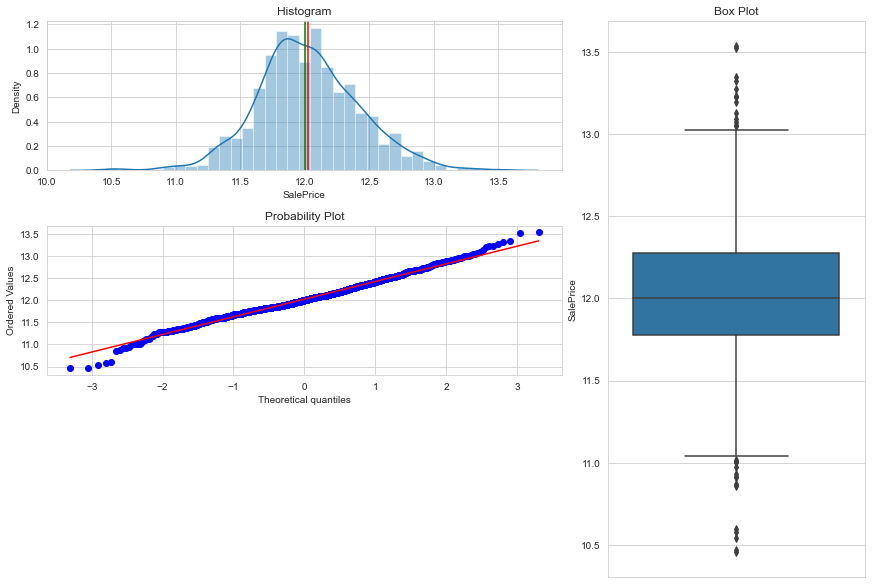

In [59]:
three_chart_plot(df, 'SalePrice')

In [60]:
null_table(features).sort_values(by = 'Approximate Percentage of Null Values').tail(10)

,Columns,Count of Null Values,Approximate Percentage of Null Values
59,GarageFinish,159,5.450806
58,GarageYrBlt,159,5.450806
62,GarageQual,159,5.450806
63,GarageCond,159,5.450806
2,LotFrontage,486,16.660953
56,FireplaceQu,1420,48.680151
72,Fence,2346,80.425094
5,Alley,2719,93.212204
73,MiscFeature,2812,96.400411
71,PoolQC,2908,99.691464


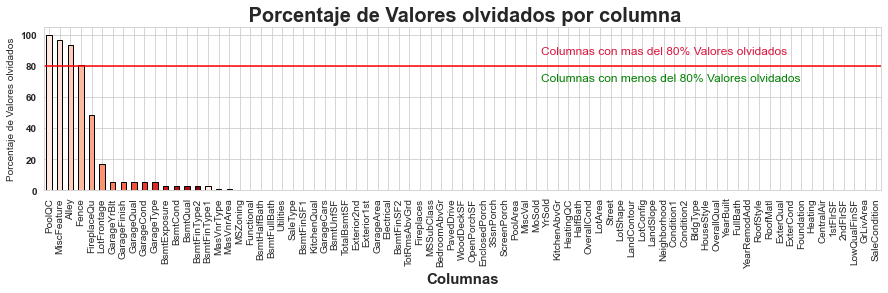

In [61]:
msv_1(features, 80, color = sns.color_palette('Reds',15))

Hay 4 características que tienen más del 80% de valores faltantes. Se elimina estas 4 características

In [62]:
features = features.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1)
features.shape

(2917, 75)

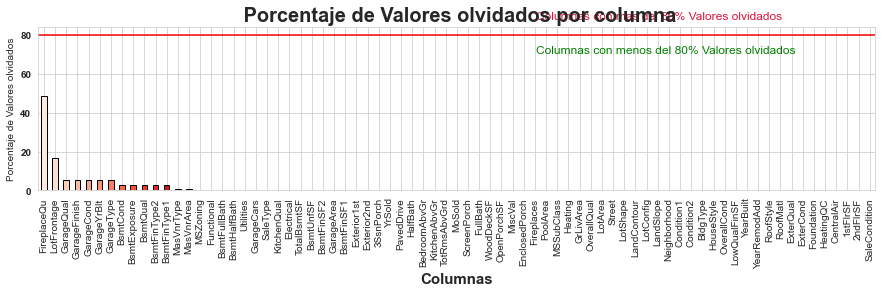

In [63]:
msv_1(features, 80, color = sns.color_palette('Reds',15))

Ahora ninguno de los campos tiene missing values por encima del 80 %.

He identificado algunos de los campos que tienen NA como una categoría. Reemplazaremos estos valores nulos con None.

Leer la descripción de las funciones es muy importante, de lo contrario no se pueden concluir los puntos anteriores.

In [64]:
def filling_null(features):
    
    # En la descripción de 'Functional Feature', se indica que Typ se refiere a la funcionalidad típica
    # Se reemplaza null values el campo 'Functional' con'Typ'
    
    features['Functional'] = features['Functional'].fillna('Typ')
    
    # Se reemplaza los valores nulos en las siguientes columnas con su moda. Estamos reemplazando con la moda porque
    # todas estas características son variables categóricas, no podemos tomar la media ni la mediana.
    
    features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])
    
    features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])
    
    features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
    
    features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])

    features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
    
    # Para completar los valores nulos para MSZoing, se tiene en cuenta el campo MSSubClass
    # Se hace esto porque el tipo de vivienda en una determinada area afecta en gran medida a la zona del area.
    
    features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
    
    # Para completar los valores nulos para LotFrontage(Pies lineales de calle conectados a la propiedad) 
    # se llenará con la mediana de los valores agrupados por  Neighborhood.
    
    features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    
    # Como se mencionó anteriormente, el valor 'NA' en muchas columnas representa la ausencia de esa característica para
    # una casa en particular, reemplazaremos esos valores nulos con None.
    # 'None' para los campos categóricos y 0 para los campos numéricos.    
    cat_features = features.select_dtypes(include = 'object').columns
    num_features = features.select_dtypes(exclude = 'object').columns
    
    features[cat_features] = features[cat_features].fillna('None')
    features[num_features] = features[num_features].fillna(0)
        
    return features

In [65]:
features = filling_null(features)
features.shape

(2917, 75)

In [66]:
features.isnull().sum().sum()

0

Ahora hay 0 valores nulos en el conjunto de datos dado.

Se procede a crear algunos campos nuevos.

# Creación de Campos

In [67]:
def new_features(features):
    
    features['HasPool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    features['Has2ndFloor'] = features['2ndFlrSF'].apply(lambda x : 1 if x > 0 else 0)
    features['HasGarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    features['HasBsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    features['HasFireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    
    # Se añade el campo total sqfootage  
    # Para obtener el área total de la casa, se debe sumar el área del sótano, el área del primer piso y el área del segundo pisoa.
    
    features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']
    
    # Numero total de baños = numero de baños completos + 0.5 * numero de medios baños
    # + numero de baños en el sótano + 0.5 * numero de medios baños en el sótano.
    
    features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                                   features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))
    
    features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                                  features['EnclosedPorch'] + features['ScreenPorch'])

    # Se añade años desde la remodelación
    features['YearsSinceRemodel'] = features['YrSold'].astype(int) - features['YearRemodAdd'].astype(int)

    return features

Se ha agregado ciertas características que son bastante intuitivas y también se tienen en cuenta en la vida real al comprar la casa. Por ejemplo, cuál es el área total en pies cuadrados de la casa o cuántos baños hay en la casa. También se podría buscar la disponibilidad de piscina, garaje, chimenea y sótano en la casa. Es por eso que se ha agregado tales características en el conjunto de datos.

In [68]:
features = new_features(features)
features.shape

(2917, 84)

In [69]:
#asimetría de las características numéricas.

num_features = features.select_dtypes(exclude = 'object').columns

skewed_features = features[num_features].apply(lambda x : x.skew()).sort_values(ascending = False)
skew_features = pd.DataFrame({'Skew Value' : skewed_features})

skew_features.head(10)

,Skew Value
MiscVal,21.950962
PoolArea,17.697766
HasPool,15.502729
LotArea,13.116240
LowQualFinSF,12.090757
3SsnPorch,11.377932
KitchenAbvGr,4.302763
BsmtFinSF2,4.146636
EnclosedPorch,4.004404
ScreenPorch,3.947131


Hay bastante asimetría en las características anteriores. Se tiene que corregir la asimetría

In [70]:
def fix_skew(features):
    
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    
    # Se obtiene todos los datos que no son del tipo "object". 
    numerical_columns = features.select_dtypes(exclude = 'object').columns

    # Se verifica la asimetria de todos los campos numéricos
    skewed_features = features[numerical_columns].apply(lambda x: x.skew()).sort_values(ascending=False)
    
    high_skew = skewed_features[abs(skewed_features) > 0.5]
    skewed_features = high_skew.index

    # Se realiza la transformación de Box-Cox
    for column in skewed_features:
        features[column] = boxcox1p(features[column], boxcox_normmax(features[column] + 1))
        
    return features

In [71]:
features = fix_skew(features)
features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleCondition,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFireplace,TotalSF,Total_Bathrooms,Total_porch_sf,YearsSinceRemodel
0,60,RL,18.144573,13.833055,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Normal,0.0,1,1.5,41.797417,0,35.576151,3.5,12.339282,5
1,20,RL,20.673626,14.117918,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,Normal,0.0,0,1.5,41.797417,1,35.371885,2.5,0.000000,31
2,60,RL,18.668047,14.476513,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Normal,0.0,1,1.5,41.797417,1,36.241070,3.5,10.090749,6
3,70,RL,17.249651,14.106197,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Abnorml,0.0,1,1.5,41.797417,1,35.120722,2.0,28.165642,36
4,60,RL,21.314283,15.022008,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,Normal,0.0,1,1.5,41.797417,1,39.002315,3.5,14.606322,8


In [72]:
features = pd.get_dummies(features).reset_index(drop=True)
features.shape

(2917, 324)

In [73]:
X = features.iloc[:len(y), :]
test = features.iloc[len(y):, :]

In [74]:
X.shape, test.shape, y.shape

((1458, 324), (1459, 324), (1458,))

# Entrenamiento y prueba de modelos de aprendizaje automático

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [77]:
def evaluation(model, x_train_std, y_train, x_test, y_test, train = True):
    if train == True:
        pred = model.predict(x_train_std)
        print (pred.shape)
        print (y_train.shape)
        
        print("Train Result:\n================================================")
        print(f"Root Mean Squared Logarithmic Error: {np.sqrt(mean_squared_log_error(y_train, pred))}")
        print("_______________________________________________")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, pred))}")
        print("_______________________________________________")
        print(f"Mean Squared Error: {mean_squared_error(y_train, pred)}")
        print("_______________________________________________")
        print(f"Mean Absolute Error: \n{mean_absolute_error(y_train, pred)}")
        print("_______________________________________________")
        
    print()
    
    if train == False:
        pred = model.predict(x_test)
        print (pred.shape)
        print (y_test.shape)
        print("Test Result:\n================================================")
        print(f"Root Mean Squared Logarithmic Error: {np.sqrt(mean_squared_log_error(y_test, pred))}")
        print("_______________________________________________")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))}")
        print("_______________________________________________")
        print(f"Mean Squared Error: {mean_squared_error(y_test, pred)}")
        print("_______________________________________________")
        print(f"Mean Absolute Error: \n{mean_absolute_error(y_test, pred)}")
        print("_______________________________________________")

**Lasso Regression**

In [78]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha = 0.1)
ls.fit(X_train, y_train)

evaluation(ls, X_train, y_train, X_test, y_test, True)
evaluation(ls, X_train, y_train, X_test, y_test, False)

(1093,)
(1093,)
Train Result:
Root Mean Squared Logarithmic Error: 0.013530175547517783
_______________________________________________
Root Mean Squared Error: 0.1740696181447512
_______________________________________________
Mean Squared Error: 0.030300231961059493
_______________________________________________
Mean Absolute Error: 
0.1210172807930139
_______________________________________________


(365,)
(365,)
Test Result:
Root Mean Squared Logarithmic Error: 0.012154359207769961
_______________________________________________
Root Mean Squared Error: 0.15620930542732248
_______________________________________________
Mean Squared Error: 0.024401347102086517
_______________________________________________
Mean Absolute Error: 
0.1144901913760848
_______________________________________________


**RIDGE REGRESSION**

La regresión de cresta es un método para estimar los coeficientes de modelos de regresión múltiple en escenarios donde las variables independientes están altamente correlacionadas. 

In [79]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)

evaluation(ridge, X_train, y_train, X_test, y_test, True)
evaluation(ridge, X_train, y_train, X_test, y_test, False)

(1093,)
(1093,)
Train Result:
Root Mean Squared Logarithmic Error: 0.006721979967632066
_______________________________________________
Root Mean Squared Error: 0.0861185367602723
_______________________________________________
Mean Squared Error: 0.00741640237373037
_______________________________________________
Mean Absolute Error: 
0.059809985504204966
_______________________________________________


(365,)
(365,)
Test Result:
Root Mean Squared Logarithmic Error: 0.008804504370110804
_______________________________________________
Root Mean Squared Error: 0.11368636145185472
_______________________________________________
Mean Squared Error: 0.012924588780161759
_______________________________________________
Mean Absolute Error: 
0.080933542186415
_______________________________________________


In [80]:
test_pred = ridge.predict(test)
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission['SalePrice'] = test_pred 
submission.head()

,Id,SalePrice
0,1461,118627.956371
1,1462,162260.536469
2,1463,189631.991585
3,1464,203213.740615
4,1465,205935.938320


In [81]:

submission.to_csv("result_ridge.csv", index = False, header = True)

In [ ]:
submission.to_csv("pred_test.csv", index = False, header = True)